# Project 1

## &nbsp;&nbsp;&nbsp;&nbsp;Import Data

In [8]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress
from citipy import citipy
import json
import statistics
import seaborn as sns

# Read in the dataframe stored in the .csv file.
df_api = pd.read_csv('/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/project1/full_df.csv')
df_csv = pd.read_csv('/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/project1/Crime_Reports.csv')

/var/folders/2h/v467wz0562dfskh2fgt2pqhm0000gn/T/ipykernel_22624/1266104131.py:15: DtypeWarning: Columns (6,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_api = pd.read_csv('/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/project1/full_df.csv')
/var/folders/2h/v467wz0562dfskh2fgt2pqhm0000gn/T/ipykernel_22624/1266104131.py:16: DtypeWarning: Columns (16,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv('/Users/robertzygmuntlehr/Desktop/DataScience/BootCamp/Challenges/project1/Crime_Reports.csv')


## &nbsp;&nbsp;&nbsp;&nbsp;Data Cleaning

In [22]:
# get the shape of the dataframe
tuple_shape_api = df_api.shape

# create a dictionary with the shape information
dict_shape_api = {'Rows': tuple_shape_api[0], 'Columns': tuple_shape_api[1]}

# print the shape information
print(dict_shape_api)

# Show the df_api columns
df_api.columns

# show a snapshot of the df_api dataframe
df_api.head(10)

#CLEANING

{'Rows': 2371193, 'Columns': 28}


,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,clearance_status,clearance_date,x_coordinate,y_coordinate,ucr_category,category_description,latitude,longitude,location,occ_year
0,20172751388,INDECENCY WITH A CHILD/CONTACT,1709,Y,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2017-10-02 21:14:00,2017-10-02T00:00:00.000,2114,...,N,2018-08-02T00:00:00.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2003.0
1,20125033273,AGG SEXUAL ASSAULT CHILD/OBJEC,1712,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2012-07-18 12:00:00,2012-07-18T00:00:00.000,1200,...,C,2013-02-27T00:00:00.000,0.0,0.0,11C,Rape,NaN,NaN,NaN,2003.0
2,2005901307,SEXUAL ASSAULT OF CHILD/OBJECT,1707,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2005-03-31 16:40:00,2005-03-31T00:00:00.000,1640,...,C,2005-07-12T00:00:00.000,0.0,0.0,11C,Rape,NaN,NaN,NaN,2003.0
3,20082611035,AGG SEXUAL ASSAULT CHILD/OBJEC,1712,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2008-09-17 11:43:00,2008-09-17T00:00:00.000,1143,...,N,2008-10-27T00:00:00.000,0.0,0.0,11C,Rape,NaN,NaN,NaN,2003.0
4,20071300652,INDECENCY WITH A CHILD/CONTACT,1709,Y,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2007-05-10 09:52:00,2007-05-10T00:00:00.000,952,...,C,2007-07-02T00:00:00.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2003.0
5,20225003646,INDECENCY WITH A CHILD/CONTACT,1709,Y,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2022-01-26 09:00:00,2022-01-26T00:00:00.000,900,...,N,2022-02-08T00:00:00.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2003.0
6,20125023519,IDENTITY THEFT,4022,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2012-05-25 11:04:00,2012-05-25T00:00:00.000,1104,...,N,2012-05-25T00:00:00.000,3127516.0,10058706.0,NaN,NaN,30.234098,-97.701898,"{'latitude': '30.2340975', 'longitude': '-97.7...",2003.0
7,20125057357,IDENTITY THEFT,4022,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2012-12-27 16:17:00,2012-12-27T00:00:00.000,1617,...,N,2012-12-28T00:00:00.000,3123592.0,10110270.0,NaN,NaN,30.376093,-97.710471,"{'latitude': '30.37609292', 'longitude': '-97....",2003.0
8,20105018815,IDENTITY THEFT,4022,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2010-04-14 14:59:00,2010-04-14T00:00:00.000,1459,...,O,2010-04-15T00:00:00.000,3131784.0,10100561.0,NaN,NaN,30.348871,-97.685233,"{'latitude': '30.34887091', 'longitude': '-97....",2003.0
9,20135010506,IDENTITY THEFT,4022,N,2003-01-01 00:00:00,2003-01-01T00:00:00.000,0,2013-03-11 17:28:00,2013-03-11T00:00:00.000,1728,...,N,2013-03-12T00:00:00.000,3103213.0,10041689.0,NaN,NaN,30.188878,-97.780071,"{'latitude': '30.18887772', 'longitude': '-97....",2003.0


In [20]:
# get the shape of the dataframe
tuple_shape_csv = df_csv.shape

# create a dictionary with the shape information
dict_shape_csv = {'Rows': tuple_shape_csv[0], 'Columns': tuple_shape_csv[1]}

# print the shape information
print(dict_shape_csv)

df_csv.columns

{'Rows': 2371193, 'Columns': 27}


Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [24]:
# randomly sample 100,000 rows from the dataset
df_api_sample = df_api.sample(n=100000)
df_csv_sample = df_csv.sample(n=100000)

# save the sample to a new CSV file
df_api_sample.to_csv('small_api_dataset.csv', index=False)
df_csv_sample.to_csv('small_csv_dataset.csv', index=False)

df_api_sample.head(3)
df_csv_sample.head(3)

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
610195,20115047193,HARASSMENT,2703,N,08/01/2011 04:00:00 PM,08/01/2011,1600.0,10/06/2011 04:30:00 PM,10/06/2011,1630.0,...,306.0,N,10/24/2011,NaN,NaN,3106668.0,10097601.0,30.342353,-97.765054,"(30.34235335, -97.76505368)"
451337,20075067313,BURGLARY OF RESIDENCE,500,N,12/20/2007 07:00:00 AM,12/20/2007,700.0,12/20/2007 06:23:00 PM,12/20/2007,1823.0,...,453.0,NaN,12/27/2007,220,Burglary,3125173.0,10119665.0,30.401816,-97.704755,"(30.40181568, -97.7047547)"
565238,20055059560,BURGLARY OF RESIDENCE,500,N,11/16/2005 08:00:00 AM,11/16/2005,800.0,11/16/2005 07:36:00 PM,11/16/2005,1936.0,...,409.0,NaN,11/17/2005,220,Burglary,3128495.0,10107901.0,30.369262,-97.695105,"(30.36926216, -97.69510501)"


## &nbsp;&nbsp;&nbsp;&nbsp;Data Visualization

In [11]:
# Scatter plot

# Box-Whiskers plot

# Histogram

# Pie Chart

# Bar chart

# Line chart

# Ribbon Graph

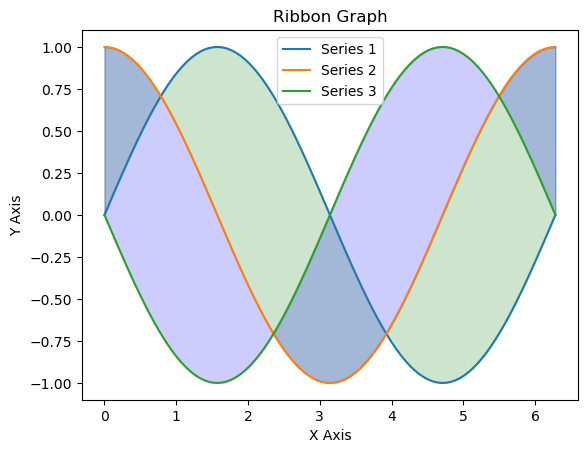

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(x+np.pi/2)
y3 = np.sin(x+np.pi)

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the data series as lines
ax.plot(x, y1, label='Series 1')
ax.plot(x, y2, label='Series 2')
ax.plot(x, y3, label='Series 3')

# Fill the area between the curves with different colors
ax.fill_between(x, y1, y2, alpha=0.2, color='green')
ax.fill_between(x, y2, y3, alpha=0.2, color='blue')

# Set the x and y labels, legend, and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.legend()
ax.set_title('Ribbon Graph')

# Show the plot
plt.show()
